In [5]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import numpy as np
from scipy.stats import norm

In [7]:
# Function to validate and convert date input
def get_valid_date():
    while True:
        date_str = input("Enter the date you bought the asset (YYYY-MM-DD): ")
        try:
            date = datetime.strptime(date_str, "%Y-%m-%d")
            return date
        except ValueError:
            print("Invalid date format. Please enter the date in YYYY-MM-DD format.")

In [9]:
# Function to download stock data for a specific date
def get_asset_data(ticker, purchase_date):
    try:
        # Fetch historical data for a specific ticker
        data = yf.download(ticker, start=purchase_date, end=purchase_date + timedelta(days=1))
        
        if data.empty:
            return {"error": f"No data found for '{ticker}' on {purchase_date.date()}."}
        
        # Get the price on the purchase date
        purchase_price = data['Close'].iloc[0]  # Get closing price for that day
        return {"ticker": ticker, "purchase_date": purchase_date, "purchase_price": purchase_price}
    
    except Exception as e:
        return {"error": f"Error fetching data for {ticker}: {e}"}

In [11]:
# Function to handle asset entry based on asset type
def enter_asset_by_type(asset_type):
    assets = []

    if asset_type in ['Stock', 'Bond', 'Fund', 'Crypto']:
        assets_input = input(f"Enter {asset_type.lower()} tickers separated by commas: ").split(',')
        for asset in assets_input:
            asset = asset.strip().upper()
            start_date = get_valid_date()  # Get the purchase date from the user
            invested_amount = float(input(f"Enter the amount of money you invested in {asset}: "))

            # Fetch the asset data (price on purchase date)
            data = get_asset_data(asset, start_date)
            if "error" not in data:
                purchase_price = data["purchase_price"]

                # Calculate the number of units purchased (amount invested / price per unit at that time)
                units_purchased = invested_amount / purchase_price

                assets.append({
                    "type": asset_type,
                    "ticker": asset,
                    "start_date": start_date,
                    "invested_amount": invested_amount,
                    "purchase_price": purchase_price,
                    "units_purchased": units_purchased
                })
            else:
                print(data["error"])


    return assets

In [13]:
# Function to choose asset type
def choose_asset_type():
    portfolio = {"Stock": [], "Bond": [], "Fund": [], "Crypto": []}

    while True:
        print("\nAsset Types: Stock, Bond, Fund, Crypto")
        asset_type = input("Choose an asset type or type 'exit' to finish: ").capitalize()

        if asset_type == 'Exit':
            print("Exiting...")
            break
        elif asset_type in ['Stock', 'Bond', 'Fund', 'Crypto']:
            assets = enter_asset_by_type(asset_type)
            if assets:
                portfolio[asset_type].extend(assets)
                print(f"\nYou entered the following {asset_type}(s):")
                for asset in assets:
                    print(asset)
        else:
            print("Invalid asset type. Please choose from Stock, Bond, Fund, or Crypto.")

    return portfolio

In [15]:
# Main execution starts here
if __name__ == "__main__":
    initial_multi_asset_portfolio = choose_asset_type()
    print("\nFinal Portfolio:")
    print(initial_multi_asset_portfolio)


Asset Types: Stock, Bond, Fund, Crypto


Choose an asset type or type 'exit' to finish:  stock
Enter stock tickers separated by commas:  NVDA
Enter the date you bought the asset (YYYY-MM-DD):  2024-05-05
Enter the amount of money you invested in NVDA:  10000


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['NVDA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2024-05-05 00:00:00 -> 2024-05-06 00:00:00)')


No data found for 'NVDA' on 2024-05-05.

Asset Types: Stock, Bond, Fund, Crypto


Choose an asset type or type 'exit' to finish:  stock
Enter stock tickers separated by commas:  NVDA
Enter the date you bought the asset (YYYY-MM-DD):  2024-05-07
Enter the amount of money you invested in NVDA:  10000


[*********************100%***********************]  1 of 1 completed



You entered the following Stock(s):
{'type': 'Stock', 'ticker': 'NVDA', 'start_date': datetime.datetime(2024, 5, 7, 0, 0), 'invested_amount': 10000.0, 'purchase_price': 90.55400085449219, 'units_purchased': 110.43134379085716}

Asset Types: Stock, Bond, Fund, Crypto


Choose an asset type or type 'exit' to finish:  stock
Enter stock tickers separated by commas:  LLY
Enter the date you bought the asset (YYYY-MM-DD):  2024-05-07
Enter the amount of money you invested in LLY:  5000


[*********************100%***********************]  1 of 1 completed



You entered the following Stock(s):
{'type': 'Stock', 'ticker': 'LLY', 'start_date': datetime.datetime(2024, 5, 7, 0, 0), 'invested_amount': 5000.0, 'purchase_price': 777.77001953125, 'units_purchased': 6.428635553493593}

Asset Types: Stock, Bond, Fund, Crypto


Choose an asset type or type 'exit' to finish:  Fund
Enter fund tickers separated by commas:  ETHU
Enter the date you bought the asset (YYYY-MM-DD):  2024-09-08
Enter the amount of money you invested in ETHU:  2500


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['ETHU']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2024-09-08 00:00:00 -> 2024-09-09 00:00:00)')


No data found for 'ETHU' on 2024-09-08.

Asset Types: Stock, Bond, Fund, Crypto


Choose an asset type or type 'exit' to finish:  fund
Enter fund tickers separated by commas:  ETHU
Enter the date you bought the asset (YYYY-MM-DD):  2024-09-13
Enter the amount of money you invested in ETHU:  2500


[*********************100%***********************]  1 of 1 completed



You entered the following Fund(s):
{'type': 'Fund', 'ticker': 'ETHU', 'start_date': datetime.datetime(2024, 9, 13, 0, 0), 'invested_amount': 2500.0, 'purchase_price': 5.119999885559082, 'units_purchased': 488.28126091393665}

Asset Types: Stock, Bond, Fund, Crypto


Choose an asset type or type 'exit' to finish:  Crypto
Enter crypto tickers separated by commas:  BTC-USD
Enter the date you bought the asset (YYYY-MM-DD):  2024-11-01
Enter the amount of money you invested in BTC-USD:  20000


[*********************100%***********************]  1 of 1 completed



You entered the following Crypto(s):
{'type': 'Crypto', 'ticker': 'BTC-USD', 'start_date': datetime.datetime(2024, 11, 1, 0, 0), 'invested_amount': 20000.0, 'purchase_price': 69482.46875, 'units_purchased': 0.28784239189831606}

Asset Types: Stock, Bond, Fund, Crypto


Choose an asset type or type 'exit' to finish:  crypto
Enter crypto tickers separated by commas:  ETH-USD
Enter the date you bought the asset (YYYY-MM-DD):  2024-11-01
Enter the amount of money you invested in ETH-USD:  5000


[*********************100%***********************]  1 of 1 completed



You entered the following Crypto(s):
{'type': 'Crypto', 'ticker': 'ETH-USD', 'start_date': datetime.datetime(2024, 11, 1, 0, 0), 'invested_amount': 5000.0, 'purchase_price': 2511.885498046875, 'units_purchased': 1.9905365924871046}

Asset Types: Stock, Bond, Fund, Crypto


Choose an asset type or type 'exit' to finish:  exit


Exiting...

Final Portfolio:
{'Stock': [{'type': 'Stock', 'ticker': 'NVDA', 'start_date': datetime.datetime(2024, 5, 7, 0, 0), 'invested_amount': 10000.0, 'purchase_price': 90.55400085449219, 'units_purchased': 110.43134379085716}, {'type': 'Stock', 'ticker': 'LLY', 'start_date': datetime.datetime(2024, 5, 7, 0, 0), 'invested_amount': 5000.0, 'purchase_price': 777.77001953125, 'units_purchased': 6.428635553493593}], 'Bond': [], 'Fund': [{'type': 'Fund', 'ticker': 'ETHU', 'start_date': datetime.datetime(2024, 9, 13, 0, 0), 'invested_amount': 2500.0, 'purchase_price': 5.119999885559082, 'units_purchased': 488.28126091393665}], 'Crypto': [{'type': 'Crypto', 'ticker': 'BTC-USD', 'start_date': datetime.datetime(2024, 11, 1, 0, 0), 'invested_amount': 20000.0, 'purchase_price': 69482.46875, 'units_purchased': 0.28784239189831606}, {'type': 'Crypto', 'ticker': 'ETH-USD', 'start_date': datetime.datetime(2024, 11, 1, 0, 0), 'invested_amount': 5000.0, 'purchase_price': 2511.885498046875, 'units_p

In [17]:
# Vitualization
import matplotlib.pyplot as plt

# Function to calculate initial investment proportions
def visualize_initial_investment(portfolio):
    labels = []
    sizes = []
    
    # Process Stock, Bond, Fund, and Gold investments
    for asset_type in ['Stock', 'Bond', 'Fund', 'Crypto']:
        total_invested = sum(item['invested_amount'] for item in portfolio[asset_type])
        if total_invested > 0:
            labels.append(asset_type)
            sizes.append(total_invested)
    
    # Plot pie chart for initial investments
    plt.figure(figsize=(7, 7))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title('Initial Investment Proportion')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

In [19]:
# Function to fetch the current price dynamically
def fetch_latest_price(ticker):
    try:
        # Download the last available data for today
        data = yf.download(ticker, period="1d")
        return data['Close'][-1]  # Return the last closing price
    except Exception as e:
        print(f"Error fetching latest price for {ticker}: {e}")
        return None

In [21]:
# Function to update portfolio with the latest prices
def update_portfolio_with_latest_prices(portfolio):
    updated_portfolio = {'Stock': [], 'Bond': [], 'Fund': [], 'Crypto': []}

    for asset_type in ['Stock', 'Bond', 'Fund', 'Crypto']:
        for asset in portfolio[asset_type]:
            latest_price = fetch_latest_price(asset['ticker'])  # Fetch the latest price
            if latest_price:
                updated_asset = {
                    'type': asset['type'],
                    'ticker': asset['ticker'],
                    'start_date': asset['start_date'],
                    'invested_amount': asset['invested_amount'],
                    'latest_price': latest_price,
                    'units_purchased': asset['units_purchased'],
                    'current_value': asset['units_purchased'] * latest_price
                }
                updated_portfolio[asset_type].append(updated_asset)
    
    return updated_portfolio

current_multi_asset_portfolio = update_portfolio_with_latest_prices(initial_multi_asset_portfolio)

[*********************100%***********************]  1 of 1 completed
/var/folders/vf/xvr_vbr13m30zk3mvk99dv0h0000gn/T/ipykernel_77593/1881802631.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return data['Close'][-1]  # Return the last closing price
[*********************100%***********************]  1 of 1 completed
/var/folders/vf/xvr_vbr13m30zk3mvk99dv0h0000gn/T/ipykernel_77593/1881802631.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return data['Close'][-1]  # Return the last closing price
[*********************100%***********************]  1 of 1 completed
/var/folders/vf/xvr_vbr13m30zk3mvk99dv0h0000g

In [23]:
initial_multi_asset_portfolio

{'Stock': [{'type': 'Stock',
   'ticker': 'NVDA',
   'start_date': datetime.datetime(2024, 5, 7, 0, 0),
   'invested_amount': 10000.0,
   'purchase_price': 90.55400085449219,
   'units_purchased': 110.43134379085716},
  {'type': 'Stock',
   'ticker': 'LLY',
   'start_date': datetime.datetime(2024, 5, 7, 0, 0),
   'invested_amount': 5000.0,
   'purchase_price': 777.77001953125,
   'units_purchased': 6.428635553493593}],
 'Bond': [],
 'Fund': [{'type': 'Fund',
   'ticker': 'ETHU',
   'start_date': datetime.datetime(2024, 9, 13, 0, 0),
   'invested_amount': 2500.0,
   'purchase_price': 5.119999885559082,
   'units_purchased': 488.28126091393665}],
 'Crypto': [{'type': 'Crypto',
   'ticker': 'BTC-USD',
   'start_date': datetime.datetime(2024, 11, 1, 0, 0),
   'invested_amount': 20000.0,
   'purchase_price': 69482.46875,
   'units_purchased': 0.28784239189831606},
  {'type': 'Crypto',
   'ticker': 'ETH-USD',
   'start_date': datetime.datetime(2024, 11, 1, 0, 0),
   'invested_amount': 5000.0

In [25]:
current_multi_asset_portfolio

{'Stock': [{'type': 'Stock',
   'ticker': 'NVDA',
   'start_date': datetime.datetime(2024, 5, 7, 0, 0),
   'invested_amount': 10000.0,
   'latest_price': 139.91000366210938,
   'units_purchased': 110.43134379085716,
   'current_value': 15450.449714190485},
  {'type': 'Stock',
   'ticker': 'LLY',
   'start_date': datetime.datetime(2024, 5, 7, 0, 0),
   'invested_amount': 5000.0,
   'latest_price': 806.0599975585938,
   'units_purchased': 6.428635553493593,
   'current_value': 5181.8659585541345}],
 'Bond': [],
 'Fund': [{'type': 'Fund',
   'ticker': 'ETHU',
   'start_date': datetime.datetime(2024, 9, 13, 0, 0),
   'invested_amount': 2500.0,
   'latest_price': 4.760000228881836,
   'units_purchased': 488.28126091393665,
   'current_value': 2324.21891370905}],
 'Crypto': [{'type': 'Crypto',
   'ticker': 'BTC-USD',
   'start_date': datetime.datetime(2024, 11, 1, 0, 0),
   'invested_amount': 20000.0,
   'latest_price': 74213.78125,
   'units_purchased': 0.28784239189831606,
   'current_valu

In [27]:
# Function to calculate current wealth proportions
def visualize_current_wealth(portfolio):
    labels = []
    sizes = []
    
    # Process Stock, Bond, Fund, and Gold wealth based on current price
    for asset_type in ['Stock', 'Bond', 'Fund', 'Crypto']:
        total_wealth = 0
        for item in portfolio[asset_type]:
            latest_price = fetch_latest_price(item['ticker'])  # Fetch the latest price
            if latest_price:
                total_wealth += item['units_purchased'] * latest_price
        if total_wealth > 0:
            labels.append(asset_type)
            sizes.append(total_wealth)
    
    # Plot pie chart for current wealth
    plt.figure(figsize=(7, 7))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title('Current Wealth Proportion')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

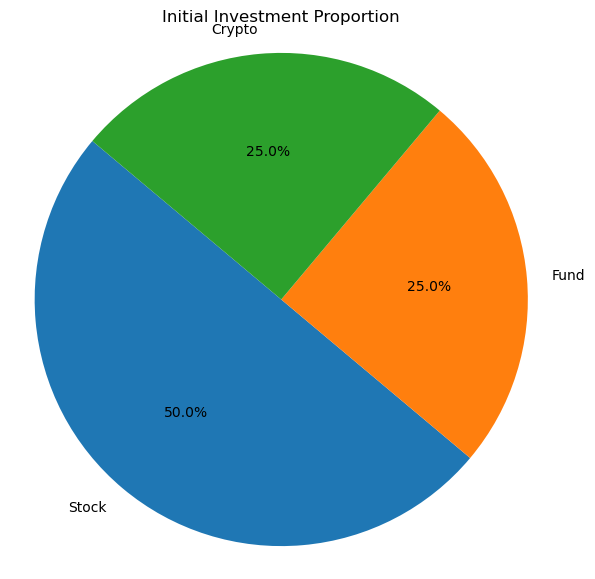

[*********************100%***********************]  1 of 1 completed
/var/folders/vf/xvr_vbr13m30zk3mvk99dv0h0000gn/T/ipykernel_57640/1881802631.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return data['Close'][-1]  # Return the last closing price
[*********************100%***********************]  1 of 1 completed
/var/folders/vf/xvr_vbr13m30zk3mvk99dv0h0000gn/T/ipykernel_57640/1881802631.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return data['Close'][-1]  # Return the last closing price
[*********************100%***********************]  1 of 1 completed
/var/folders/vf/xvr_vbr13m30zk3mvk99dv0h0000g

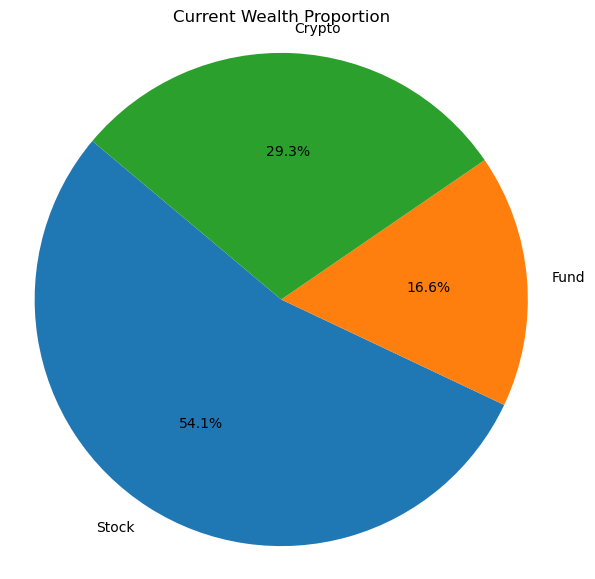

In [25]:
# Visualize initial investment proportion
visualize_initial_investment(initial_multi_asset_portfolio)

# Visualize current wealth proportion
visualize_current_wealth(current_multi_asset_portfolio)

In [29]:
# Function to calculate and print detailed portfolio performance
def print_portfolio_performance(portfolio):
    total_initial_value = 0
    total_current_value = 0
    
    print("\n=== Portfolio Performance ===")
    
    # Process Stocks, Bonds, Funds, and Gold
    for asset_type in ['Stock', 'Bond', 'Fund', 'Crypto']:
        asset_initial_value = 0
        asset_current_value = 0
        print(f"\n=== {asset_type} Performance ===")
        
        for asset in portfolio[asset_type]:
            initial_value = asset['invested_amount']
            latest_price = fetch_latest_price(asset['ticker'])  # Fetch the latest price
            if latest_price:
                current_value = asset['units_purchased'] * latest_price
                asset_initial_value += initial_value
                asset_current_value += current_value
                
                # Calculate percentage change and absolute change
                change_percentage = ((current_value - initial_value) / initial_value) * 100
                change_value = current_value - initial_value
                
                # Print individual asset performance including net worth
                print(f"{asset['ticker']}: {current_value:.2f} USD, {change_percentage:+.2f}% ({change_value:+.2f} USD)")
        
        # Calculate and print asset type performance
        if asset_initial_value > 0:
            asset_change_percentage = ((asset_current_value - asset_initial_value) / asset_initial_value) * 100
            asset_change_value = asset_current_value - asset_initial_value
            print(f"Total {asset_type}: {asset_current_value:.2f} USD, {asset_change_percentage:+.2f}% ({asset_change_value:+.2f} USD)")
        
        # Update portfolio totals
        total_initial_value += asset_initial_value
        total_current_value += asset_current_value
    
    # Calculate and print total portfolio performance
    total_change_percentage = ((total_current_value - total_initial_value) / total_initial_value) * 100
    total_change_value = total_current_value - total_initial_value
    print(f"\n=== Total Portfolio: {total_current_value:.2f} USD, {total_change_percentage:+.2f}% ({total_change_value:+.2f} USD) ===")

print_portfolio_performance(initial_multi_asset_portfolio)

[*********************100%***********************]  1 of 1 completed
/var/folders/vf/xvr_vbr13m30zk3mvk99dv0h0000gn/T/ipykernel_77593/1881802631.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return data['Close'][-1]  # Return the last closing price
[*********************100%***********************]  1 of 1 completed
/var/folders/vf/xvr_vbr13m30zk3mvk99dv0h0000gn/T/ipykernel_77593/1881802631.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return data['Close'][-1]  # Return the last closing price
[*********************100%***********************]  1 of 1 completed
/var/folders/vf/xvr_vbr13m30zk3mvk99dv0h0000g


=== Portfolio Performance ===

=== Stock Performance ===
NVDA: 15450.45 USD, +54.50% (+5450.45 USD)
LLY: 5181.87 USD, +3.64% (+181.87 USD)
Total Stock: 20632.32 USD, +37.55% (+5632.32 USD)

=== Bond Performance ===

=== Fund Performance ===
ETHU: 2324.22 USD, -7.03% (-175.78 USD)
Total Fund: 2324.22 USD, -7.03% (-175.78 USD)

=== Crypto Performance ===
BTC-USD: 21335.13 USD, +6.68% (+1335.13 USD)



/var/folders/vf/xvr_vbr13m30zk3mvk99dv0h0000gn/T/ipykernel_77593/1881802631.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return data['Close'][-1]  # Return the last closing price
[*********************100%***********************]  1 of 1 completed

ETH-USD: 5234.60 USD, +4.69% (+234.60 USD)
Total Crypto: 26569.73 USD, +6.28% (+1569.73 USD)

=== Total Portfolio: 49526.26 USD, +16.53% (+7026.26 USD) ===



/var/folders/vf/xvr_vbr13m30zk3mvk99dv0h0000gn/T/ipykernel_77593/1881802631.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return data['Close'][-1]  # Return the last closing price
